In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as mc

In [11]:
data=pd.read_csv("Test.csv")
data.isna().sum()


date_time              14255
is_holiday             14255
air_pollution_index    14255
humidity               14255
wind_speed             14255
wind_direction         14255
visibility_in_miles    14255
dew_point              14255
temperature            14255
rain_p_h               14255
snow_p_h               14255
clouds_all             14255
weather_type           14255
weather_description    14255
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            199 non-null    object 
 1   is_holiday           199 non-null    object 
 2   air_pollution_index  199 non-null    float64
 3   humidity             199 non-null    float64
 4   wind_speed           199 non-null    float64
 5   wind_direction       199 non-null    float64
 6   visibility_in_miles  199 non-null    float64
 7   dew_point            199 non-null    float64
 8   temperature          199 non-null    float64
 9   rain_p_h             199 non-null    float64
 10  snow_p_h             199 non-null    float64
 11  clouds_all           199 non-null    float64
 12  weather_type         199 non-null    object 
 13  weather_description  199 non-null    object 
dtypes: float64(10), object(4)
memory usage: 1.5+ MB


In [13]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,18-05-2017 00:00,None,73.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Rain,moderate rain
1,18-05-2017 00:00,None,251.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Mist,mist
2,18-05-2017 00:00,None,75.0,56.0,1.0,0.0,1.0,1.0,285.15,0.0,0.0,90.0,Drizzle,light intensity drizzle
3,18-05-2017 01:00,None,98.0,56.0,1.0,351.0,2.0,2.0,284.79,0.0,0.0,90.0,Rain,heavy intensity rain
4,18-05-2017 01:00,None,283.0,56.0,1.0,351.0,1.0,1.0,284.79,0.0,0.0,90.0,Mist,mist


In [14]:
data.dropna(inplace=True)
data.drop('is_holiday',
  axis='columns', inplace=True)
data.isna().sum()
data

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,18-05-2017 00:00,73.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Rain,moderate rain
1,18-05-2017 00:00,251.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Mist,mist
2,18-05-2017 00:00,75.0,56.0,1.0,0.0,1.0,1.0,285.15,0.0,0.0,90.0,Drizzle,light intensity drizzle
3,18-05-2017 01:00,98.0,56.0,1.0,351.0,2.0,2.0,284.79,0.0,0.0,90.0,Rain,heavy intensity rain
4,18-05-2017 01:00,283.0,56.0,1.0,351.0,1.0,1.0,284.79,0.0,0.0,90.0,Mist,mist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,23-05-2017 01:00,202.0,61.0,2.0,163.0,2.0,2.0,283.60,0.0,0.0,1.0,Rain,light rain
195,23-05-2017 02:00,65.0,61.0,2.0,163.0,7.0,7.0,283.16,0.0,0.0,40.0,Rain,moderate rain
196,23-05-2017 02:00,293.0,60.0,1.0,164.0,1.0,1.0,283.16,0.0,0.0,40.0,Drizzle,drizzle
197,23-05-2017 03:00,160.0,60.0,1.0,164.0,6.0,6.0,282.78,0.0,0.0,40.0,Rain,moderate rain


In [15]:
data= data[data['weather_type'].notna()]
data.weather_type

0         Rain
1         Mist
2      Drizzle
3         Rain
4         Mist
        ...   
194       Rain
195       Rain
196    Drizzle
197       Rain
198    Drizzle
Name: weather_type, Length: 199, dtype: object

# Classification

In [16]:
Types_of_Weather=data.weather_type.unique().tolist()
Types_of_Weather

['Rain', 'Mist', 'Drizzle', 'Clouds', 'Clear', 'Haze']

In [17]:
values=data.weather_type.value_counts().tolist()
values

[52, 47, 41, 40, 18, 1]

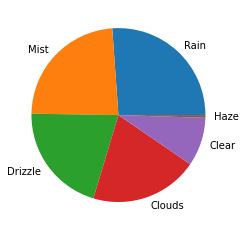

In [18]:
plt.pie(values,labels=Types_of_Weather)
plt.show()

In [26]:
x=data.iloc[:,1:-2]
y=data.iloc[:,-2]
y

0         Rain
1         Mist
2      Drizzle
3         Rain
4         Mist
        ...   
194       Rain
195       Rain
196    Drizzle
197       Rain
198    Drizzle
Name: weather_type, Length: 199, dtype: object

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


In [30]:
sc=StandardScaler()
x_train_scale=sc.fit_transform(x_train)
x_test_scale=sc.transform(x_test)

In [31]:
x_train_scale

array([[-0.6445449 , -1.65093286,  1.52014624, ...,  0.        ,
         0.        ,  0.47060884],
       [-0.1673943 , -0.77683496, -0.84949348, ...,  0.        ,
         0.        ,  0.47060884],
       [-1.15660895, -1.51645626,  0.33532638, ...,  0.        ,
         0.        , -2.66478935],
       ...,
       [ 1.34552224,  0.50069275, -0.84949348, ...,  0.        ,
         0.        ,  0.47060884],
       [ 0.49596141,  1.57650556, -0.25708355, ...,  0.        ,
         0.        ,  0.47060884],
       [-1.43591662, -0.03721365, -0.25708355, ...,  0.        ,
         0.        ,  0.47060884]])

In [33]:
knC=KNeighborsClassifier(n_neighbors=3)

In [34]:
knC.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_predict=knC.predict(x_test_scale)
y_predict

array(['Mist', 'Drizzle', 'Clouds', 'Mist', 'Clear', 'Clouds', 'Drizzle',
       'Clouds', 'Clouds', 'Drizzle', 'Drizzle', 'Mist', 'Rain', 'Clouds',
       'Clear', 'Drizzle', 'Clouds', 'Rain', 'Rain', 'Mist', 'Mist',
       'Clouds', 'Mist', 'Drizzle', 'Clouds', 'Drizzle', 'Mist', 'Clear',
       'Clear', 'Clouds', 'Clouds', 'Mist', 'Clouds', 'Mist', 'Drizzle',
       'Rain', 'Drizzle', 'Drizzle', 'Clear', 'Haze'], dtype=object)

In [38]:
mc.accuracy_score(y_test,y_predict)

0.325

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data.columns

Index(['date_time', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'culster_labels'],
      dtype='object')

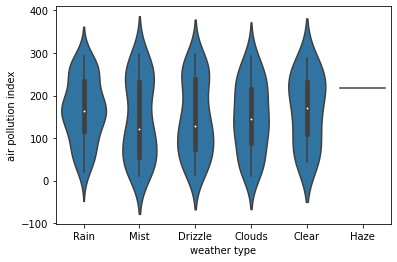

In [ ]:
sns.violinplot(data=data,x='weather_type',y='air_pollution_index',color=sns.color_palette()[0])
plt.xlabel("weather type")
plt.ylabel("air pollution index")
plt.show()

In [ ]:
x=data[['humidity', 'air_pollution_index']]
x

,humidity,air_pollution_index
0,63.0,73.0
1,63.0,251.0
2,56.0,75.0
3,56.0,98.0
4,56.0,283.0
...,...,...
194,61.0,202.0
195,61.0,65.0
196,60.0,293.0
197,60.0,160.0


In [ ]:
km=KMeans(n_clusters=3)

In [ ]:
cluster_labels=km.fit_predict(x)
cluster_labels

array([1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0,
       0])

In [ ]:
data["culster_labels"]=cluster_labels
data

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,culster_labels
0,18-05-2017 00:00,73.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Rain,moderate rain,1
1,18-05-2017 00:00,251.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Mist,mist,2
2,18-05-2017 00:00,75.0,56.0,1.0,0.0,1.0,1.0,285.15,0.0,0.0,90.0,Drizzle,light intensity drizzle,1
3,18-05-2017 01:00,98.0,56.0,1.0,351.0,2.0,2.0,284.79,0.0,0.0,90.0,Rain,heavy intensity rain,1
4,18-05-2017 01:00,283.0,56.0,1.0,351.0,1.0,1.0,284.79,0.0,0.0,90.0,Mist,mist,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,23-05-2017 01:00,202.0,61.0,2.0,163.0,2.0,2.0,283.60,0.0,0.0,1.0,Rain,light rain,2
195,23-05-2017 02:00,65.0,61.0,2.0,163.0,7.0,7.0,283.16,0.0,0.0,40.0,Rain,moderate rain,1
196,23-05-2017 02:00,293.0,60.0,1.0,164.0,1.0,1.0,283.16,0.0,0.0,40.0,Drizzle,drizzle,2
197,23-05-2017 03:00,160.0,60.0,1.0,164.0,6.0,6.0,282.78,0.0,0.0,40.0,Rain,moderate rain,0


In [ ]:
km.cluster_centers_

array([[ 72.98571429, 147.15714286],
       [ 76.66666667,  52.83333333],
       [ 77.84057971, 249.28985507]])

In [ ]:
km.labels_

array([1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0,
       0])

In [ ]:
km.n_iter_

8

In [ ]:
group0=data[data.culster_labels==0]
group1=data[data.culster_labels==1]
group2=data[data.culster_labels==2]

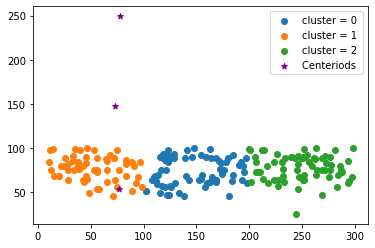

In [ ]:
plt.scatter(group0.air_pollution_index,group0.humidity,label="cluster = 0")
plt.scatter(group1.air_pollution_index,group1.humidity,label="cluster = 1")
plt.scatter(group2.air_pollution_index,group2.humidity,label="cluster = 2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label="Centeriods ",marker="*",color="purple")
plt.legend()
plt.show()